##### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [1]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline

import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

import random
import numpy as np

# Check PyTorch version
# torch.__version__

In [2]:
#Setting up weight and bias


weight = 0.3
bias = 0.9

#setting up datapoints

x = torch.arange(0,1,0.02)

y = torch.arange(0,1,0.02)

print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: torch.Size([50]), y shape: torch.Size([50])


In [3]:
#splitting the data into train and test

train_split = int(0.8* len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [4]:
#plotting test and train data 


def plot_predictions(train_data = x_train, 
                    test_data = x_test,
                     train_labels = y_train,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10,7))
    
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


          
      # Show the legend
    plt.legend(prop={"size": 14})

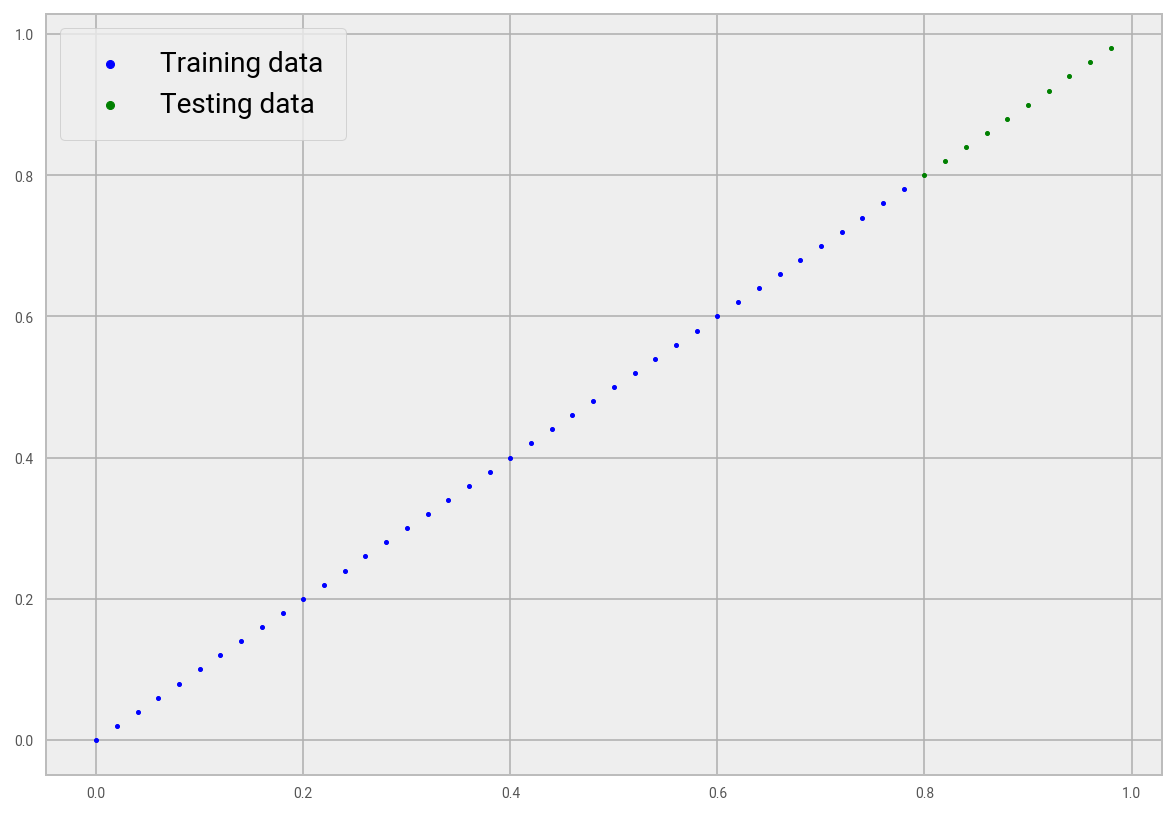

In [5]:
plot_predictions();

###### 2. Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [6]:
#creating a linear regression model and setting up parameter

class LinearRegressionModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                        requires_grad = True,
                                               ))
        self.bias = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float # 
        ))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [7]:
#making a instance of it and checking its state_dict()

torch.manual_seed(42)

model_1 = LinearRegressionModel()

model_1.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
print(f"weight: {weight}, bias: {bias}")

weight: 0.3, bias: 0.9


As we randomly started we can see that the value model predicted and the ideal values are far from each other. We train the model in further code to get as close as the ideal value

###### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [9]:
#setting up the loss:

loss_fn = nn.L1Loss()

#setting up optimizer with learning rate 0.01

optimizer = torch.optim.SGD(params = model_1.parameters(), lr =0.01)

In [10]:
torch.manual_seed(42)

epochs = 300

epoch_count =[]
loss_values = []
test_loss_values =[]

#looping through dataset:

for epoch in range(epochs):
    #setting up model to training mode
    model_1.train()
    
    #forward pass
    y_pred_new = model_1(x_train)
    
    #calculate loss
    
    loss = loss_fn (y_pred_new, y_train)
    #print(f"Loss:{loss}")
    
    #setting up optimizer zerograd
    
    optimizer.zero_grad()
    
    #performing backward propogartion to negotiate loss
    
    loss.backward(retain_graph = True)
    
    #setting up gradient descent
    
    optimizer.step()
    
    #setting up testing mode
    
    model_1.eval()
    
    with torch.no_grad():
        
        #do the forward pass to predict the value on the test data
        test_pred = model_1(x_test)
        
        #calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 20 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch}, Loss:{loss},Test Loss : {test_loss}")
        


Epoch:0, Loss:0.16443711519241333,Test Loss : 0.45346564054489136
Epoch:20, Loss:0.1240791454911232,Test Loss : 0.3392970860004425
Epoch:40, Loss:0.11116994917392731,Test Loss : 0.28111687302589417
Epoch:60, Loss:0.10350941121578217,Test Loss : 0.2502627968788147
Epoch:80, Loss:0.09652940928936005,Test Loss : 0.22822265326976776
Epoch:100, Loss:0.08959401398897171,Test Loss : 0.208930104970932
Epoch:120, Loss:0.0827229842543602,Test Loss : 0.19238515198230743
Epoch:140, Loss:0.07585816085338593,Test Loss : 0.17652709782123566
Epoch:160, Loss:0.06899011135101318,Test Loss : 0.1606689989566803
Epoch:180, Loss:0.06211661547422409,Test Loss : 0.14481094479560852
Epoch:200, Loss:0.05525090545415878,Test Loss : 0.12826602160930634
Epoch:220, Loss:0.04838607832789421,Test Loss : 0.11240806430578232
Epoch:240, Loss:0.041512683033943176,Test Loss : 0.0965500921010971
Epoch:260, Loss:0.03464363515377045,Test Loss : 0.08000518381595612
Epoch:280, Loss:0.027778804302215576,Test Loss : 0.0641471892

In [11]:
print(model_1.state_dict())

OrderedDict([('weights', tensor([0.8961])), ('bias', tensor([0.0438]))])


##### 4. Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [12]:
#make prediction with new trained model
#after 300 epochs lets see how good our model predicts
#create a random seed
import torch

with torch.no_grad():
    y_pred_new = model_1(x_test)
    
y_pred_new

tensor([0.7607, 0.7786, 0.7965, 0.8144, 0.8323, 0.8503, 0.8682, 0.8861, 0.9040,
        0.9219])

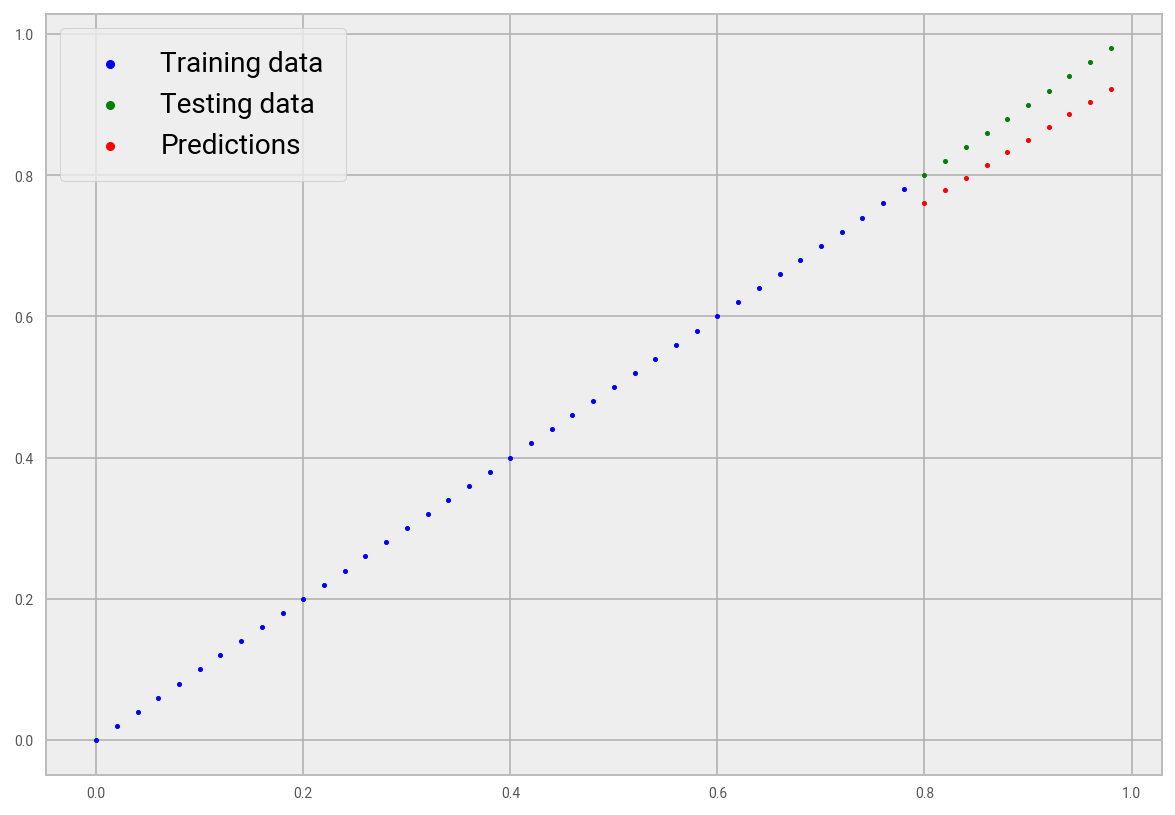

In [13]:
plot_predictions(predictions = y_pred_new)

##### Plotting loss curves

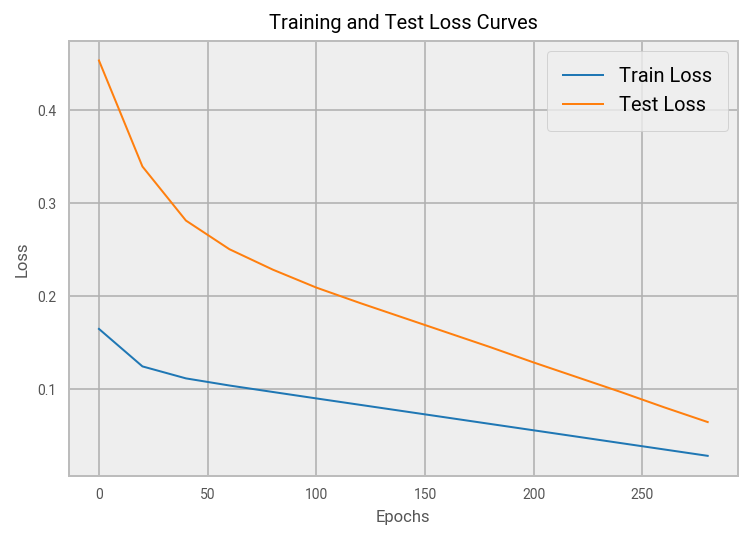

In [14]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = 'Test Loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

###### 5. Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [15]:
from pathlib import Path #python module to deal with saving

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) #model_path.make directory (parents directory created. )

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [16]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.8961])), ('bias', tensor([0.0438]))])

In [17]:
# To load in a saved state_dict we have to instatntiate a new instance of our model class

loaded_model_1 = LinearRegressionModel() #create new instance of our model class

#show the state_dict of new loaded model_0

loaded_model_1.state_dict() #without calling our state_dict into it, the model will show the random dict. 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
#NOW LOADING THE SAVED STATE DICT OF THE MODEL_0 INTO THE NEW LOADED MODEL

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
#Make some predictions with our loaded model with saved state dict

loaded_model_1.eval() #loading the tested mode

with torch.no_grad():
    loaded_model_preds = loaded_model_1(x_test)
    
loaded_model_preds

tensor([0.7607, 0.7786, 0.7965, 0.8144, 0.8323, 0.8503, 0.8682, 0.8861, 0.9040,
        0.9219])

In [20]:
#compare the loaded model preds with model_0 model preds

y_pred_new == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])